In [1]:
pip install google-api-python-client 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



# Extracting the Data from the Youtube API V3

In [ ]:


from googleapiclient.discovery import build
from dotenv import load_dotenv
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

#access the data from the dotenv file
load_dotenv()

# setting up the youtube API key to access the channels
API_KEY = os.getenv("API_KEY")
youtube = build('youtube', 'v3', developerKey=API_KEY)
# this creates a connection to youtube API v3


In [2]:
# List of channel id which will be used to get the data from the corresponding channel

channel_ids = [" UCq-Fj5jknLsUf-MWSy4_brA", #Tseris
               "UCupvZG-5ko_eiXAupbDfxWw", #Cnn
               "UCvC4D8onUfXzvjTOM-dBfEA", #Marvel
               "UCMiJRAwDNSNzuYeN2uWa0pA", #Techchannel
               "UCYPvAwZP8pZhSMW8qs7cVCw", #India Today
               "UCb-xXZ7ltTvrh9C6DgB9H-Q", #Prasd Tech in telugu
               "UCBi2mrWuNuyYy4gbM6fU18Q", #ABC NEws
               "UCnQC_G5Xsjhp9fEJKuIcrSw", #Benshapiro
               "UCXuqSBlHAE6Xw-yeJA0Tunw", #LinusTech
               "UCsTcErHg8oDvUnTzoqsYeNw", #Unboxtheropy
               "UCOmcA3f_RrH6b9NmcNa4tdg", #CNET
               "UCOpcACMWblDls9Z6GERVi1A", #Screen Junkies
               "UCVtL1edhT8qqY-j2JIndMzg", #CineFix
               "UCLXo7UDZvByw2ixzpQCufnA", #Vox
               "UCvJJ_dzjViJCoLf5uKUTwoA", #CNBC
               "CoUxsWakJucWg46KW5RsvPw",  #Financial
               "UCX6b17PVsYBQ0ip5gyeme-Q", #CrashCourse
               "UC4a-Gbdw7vOaccHmFo40b9g", #Khan Academy
               "UCsooa4yRKGN_zEE8iknghZA", #Ted-ed
               "UCq2E1mIwUKMWzCA4liA_XGQ", #PickUpLimes
               "UCJ24N4O0bP7LGLBDvye7oCA", #Matt
               "UCSPYNpQ2fHv9HJ-q6MIMaPw", #Financialdiet
               "UCFKE7WVJfvaHW5q283SxchA", #Yoga with Adriene
              ]


In [3]:


def get_channel_stats(youtube, channel_ids):
    """
    This function retrieves channel statistics from the YouTube API.

    Parameters:
    youtube (googleapiclient.discovery.Resource): An authenticated instance of the YouTube API.
    channel_ids (list): A list of YouTube channel IDs for which to retrieve statistics.
    Returns:
    list: A list of dictionaries, where each dictionary contains the following keys:
          - Channel_name: The name of the YouTube channel.
          - Subscribers: The number of subscribers to the channel.
          - Views: The total number of views on the channel.
          - Total_videos: The total number of videos uploaded to the channel.
          - playlist_id: The ID of the channel's upload playlist.
    """
    all_data = []
    request = youtube.channels().list(
                part='snippet,contentDetails,statistics',
                id=','.join(channel_ids))
    response = request.execute() 

    for i in range(len(response['items'])):
        data = dict(Channel_name = response['items'][i]['snippet']['title'],
                    Subscribers = response['items'][i]['statistics']['subscriberCount'],
                    Views = response['items'][i]['statistics']['viewCount'],
                    Total_videos = response['items'][i]['statistics']['videoCount'],
                    playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data


In [4]:
# Calling the function to get the channel statistics 
channel_statistics = get_channel_stats(youtube, channel_ids)

# Storing the data in a pandas dataframe
channel_data = pd.DataFrame(channel_statistics)

channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Ben Shapiro,7230000,4286908293,8112,UUnQC_G5Xsjhp9fEJKuIcrSw
1,The Financial Diet,1230000,156684262,1345,UUSPYNpQ2fHv9HJ-q6MIMaPw
2,TED-Ed,21200000,4227731329,2239,UUsooa4yRKGN_zEE8iknghZA
3,Khan Academy,8830000,2156066993,8637,UU4a-Gbdw7vOaccHmFo40b9g
4,Matt D'Avella,3910000,311780858,435,UUJ24N4O0bP7LGLBDvye7oCA
5,Unbox Therapy,24800000,4813127795,2339,UUsTcErHg8oDvUnTzoqsYeNw
6,CNN,17800000,17545276344,170268,UUupvZG-5ko_eiXAupbDfxWw
7,T-Series,288000000,289108878422,22911,UUq-Fj5jknLsUf-MWSy4_brA
8,Marvel Entertainment,21200000,6477910876,9469,UUvC4D8onUfXzvjTOM-dBfEA
9,Linus Tech Tips,16300000,8547702704,7222,UUXuqSBlHAE6Xw-yeJA0Tunw


In [5]:
video_ids = []

# Getting the video ids from the channel's upload playlist
for channel_id in channel_data['playlist_id']:
    request = youtube.playlistItems().list(
                        part='snippet',
                        playlistId = channel_id,
                        maxResults = 50
                        )
    response = request.execute()
            
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['snippet']['resourceId']['videoId']) #appending the video ids to the list

In [6]:
def get_video_details(youtube, video_ids):
    """
    Retrieves detailed statistics for a list of YouTube video IDs.

    Parameters:
    youtube (googleapiclient.discovery.Resource): An authenticated instance of the YouTube API.
    video_ids (list): A list of YouTube video IDs for which to retrieve statistics.

    Returns:
    list: A list of dictionaries, where each dictionary contains the following keys:
          - Title: The title of the video.
          - Published_date: The date and time when the video was published.
          - Views: The number of views on the video.
          - Likes: The number of likes on the video.
          - Categories: The category ID of the video.
          - Comments: The number of comments on the video.
    """
    all_video_stats = []

    for i in range(0, len(video_ids), 50):  # YouTube API allows max 50 videos per request
        request = youtube.videos().list(
            part="snippet,statistics",
            id=",".join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response.get("items", []):  # Prevent KeyError if 'items' is missing
            video_stats = dict(
                Title=video["snippet"]["title"],
                Published_date=video["snippet"]["publishedAt"],
                Views=video["statistics"].get("viewCount", 0),  # .get() to handle missing data
                Likes=video["statistics"].get("likeCount", 0),
                Categories = video["snippet"]["categoryId"],
                Comments=video["statistics"].get("commentCount", 0)  # Removed 'dislikeCount'
            )
            all_video_stats.append(video_stats)

    return all_video_stats


In [7]:
# Getting the each video details
video_details = get_video_details(youtube, video_ids)
# storing the details into a dataframe
video_data = pd.DataFrame(video_details)

video_data.head(100)

,Title,Published_date,Views,Likes,Categories,Comments
0,Gavin Newsom's new view on men in women's sports,2025-03-15T22:00:31Z,23840,2924,25,88
1,"Newsom Tries Podcasting, NASA Tries a Moon Lan...",2025-03-15T19:00:44Z,59217,2369,25,187
2,OF COURSE a ghost hunter murder for hire story...,2025-03-15T17:00:29Z,30043,3672,25,122
3,This will be a VERY disappointing moment for t...,2025-03-15T15:01:07Z,58874,4732,25,238
4,Top 4 Historically INACCURATE Films,2025-03-15T14:00:34Z,77912,3112,25,849
...,...,...,...,...,...,...
95,Some thoughts on beauty as currency (and bette...,2025-01-16T02:15:57Z,64826,5707,26,145
96,Why It Feels Like You’ll Never Catch Up,2025-01-14T00:02:05Z,13906,843,26,15
97,Supporting You With Your 2025 Money Resolutions,2025-01-09T21:11:00Z,8491,349,26,6
98,Why It Feels Like You’ll Never Catch Up,2024-12-31T17:00:06Z,492338,2946,26,192


In [8]:
categories = video_data['Categories']

category_data = []
for i in categories:
    request = youtube.videoCategories().list(
      part = 'snippet',
      id = i
   )

    response = request.execute()
    
    for vid in response.get('items',[]):
       category_data.append(vid['snippet']['title'])
categories_column = pd.DataFrame(category_data)

video_data['Categories'] = categories_column

In [ ]:
# displaying all rows and columns

pd.set_option('display.max_rows', None)


# Uploading the data into a csv file
video_data.to_csv('youtube_data.csv',index=False)

change_date = []

for data in video_data['Published_date']:
    data = datetime.strptime(str(data), "%Y-%m-%d %H:%M:%S").strftime('%Y-%m-%d')
    video_data['Published_date'] = data



# Displaying the first 50 rows of the data
video_data.head(50)


,Title,Published_date,Views,Likes,Categories,Comments
0,Gavin Newsom's new view on men in women's sports,2023-01-12,23840,2924,News & Politics,88
1,"Newsom Tries Podcasting, NASA Tries a Moon Lan...",2023-01-12,59217,2369,News & Politics,187
2,OF COURSE a ghost hunter murder for hire story...,2023-01-12,30043,3672,News & Politics,122
3,This will be a VERY disappointing moment for t...,2023-01-12,58874,4732,News & Politics,238
4,Top 4 Historically INACCURATE Films,2023-01-12,77912,3112,News & Politics,849
5,The DOEs death by 2000 cuts,2023-01-12,52581,5778,News & Politics,260
6,Democrats are beginning to CURSE in interviews!?,2023-01-12,45326,3969,News & Politics,280
7,The Babylon Bee CEO Seth Dillon On Doing Comed...,2023-01-12,20360,968,News & Politics,186
8,Jasmine Crockett is the new AOC,2023-01-12,36693,3369,News & Politics,324
9,Speaker Mike Johnson On Reducing The Size And ...,2023-01-12,17112,999,News & Politics,174


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Videos')

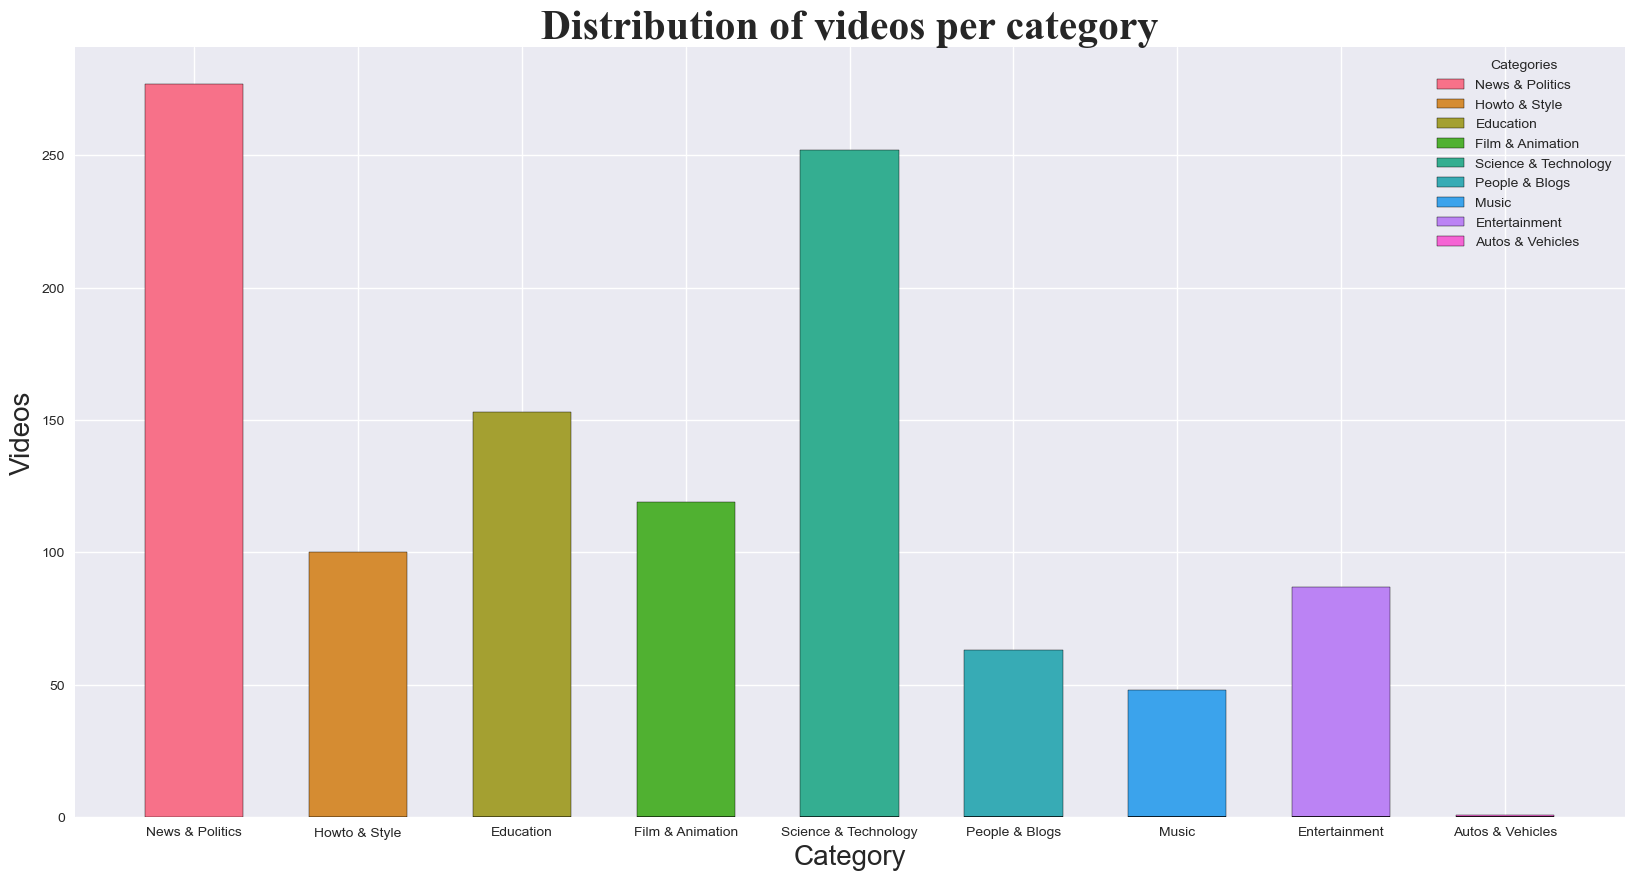

In [ ]:
# Plotting number of views per category

plt.figure(figsize=(20,10))
sns.histplot(x ='Categories',data=video_data,palette='husl', hue='Categories',alpha=1,shrink=0.6)
plt.title('Distribution of videos per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Videos', fontsize=20)




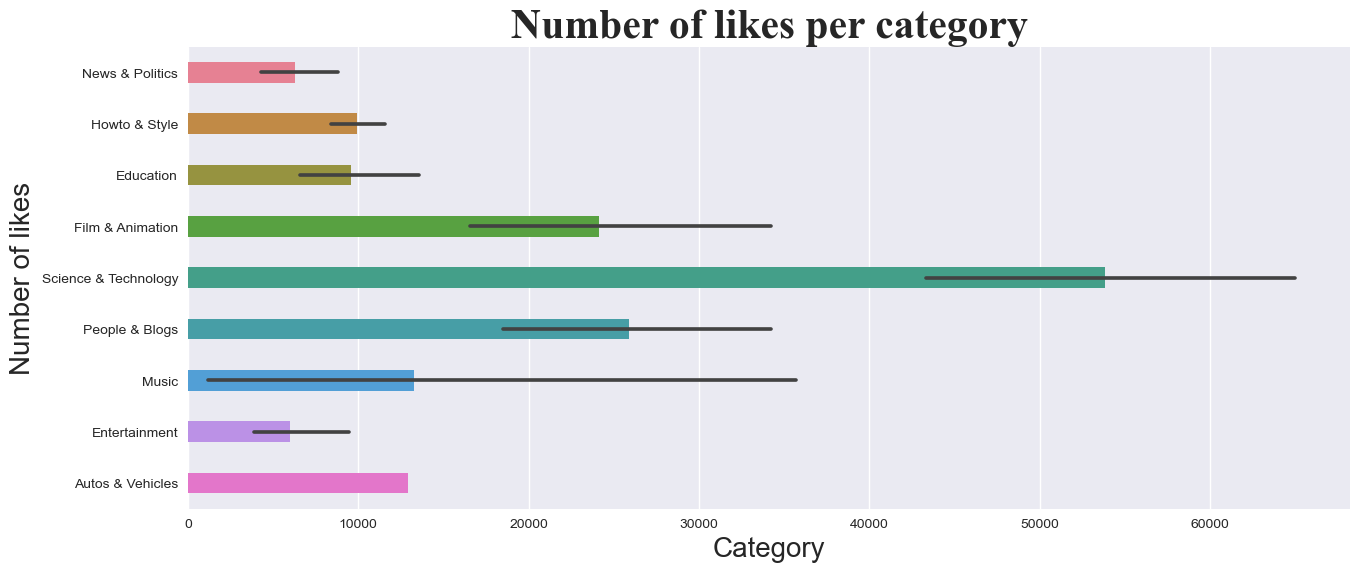

In [115]:
# Plotting number of likes per category
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8')

csv_data = pd.read_csv('youtube_data.csv')

sns.barplot( y='Categories',x='Likes', data=csv_data,palette='husl',hue='Categories',width=0.4)
plt.title('Number of likes per category', fontsize=30, fontweight='bold',fontname='times new roman')
plt.xlabel('Category', fontsize=20)
plt.ylabel('Number of likes', fontsize=20)

plt.show()

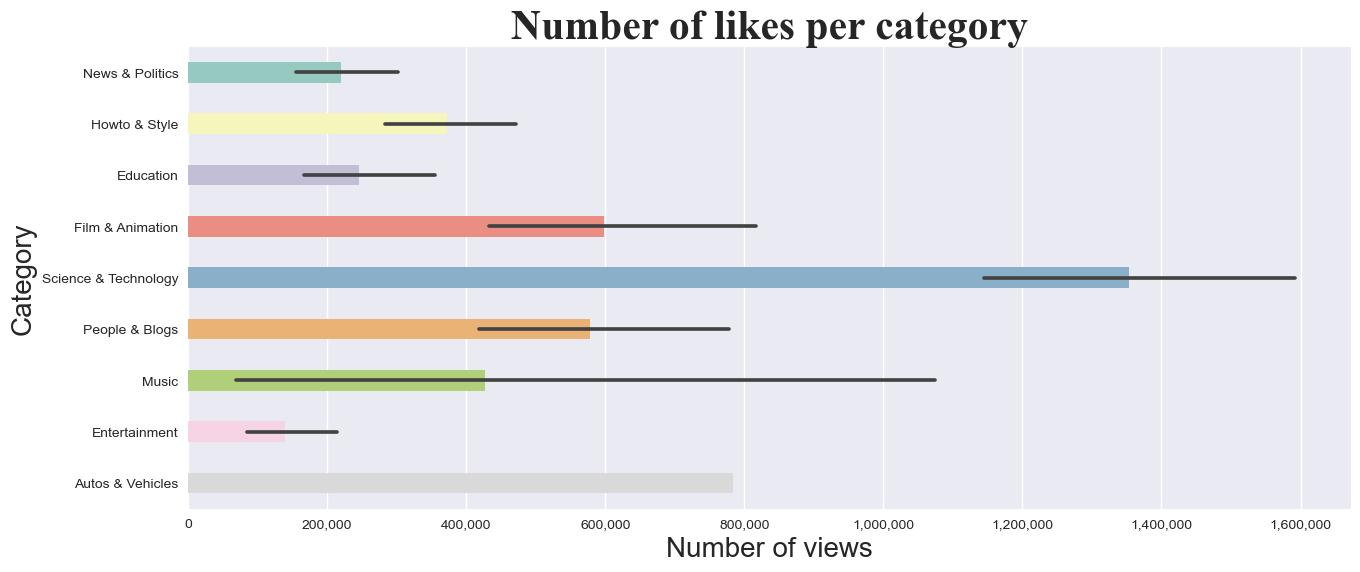

In [118]:
import matplotlib.ticker as ticker

# Plotting number of likes per category
plt.figure(figsize=(15,6))
plt.style.use('seaborn-v0_8')

csv_data = pd.read_csv('youtube_data.csv')
ax = plt.gca()
sns.barplot( y='Categories',x='Views', data=csv_data,palette='Set3',hue='Categories',width=0.4)
plt.title('Number of likes per category', fontsize=30, fontweight='bold',fontname='times new roman')

ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Number of views', fontsize=20)
plt.ylabel('Category', fontsize=20)
plt.show()

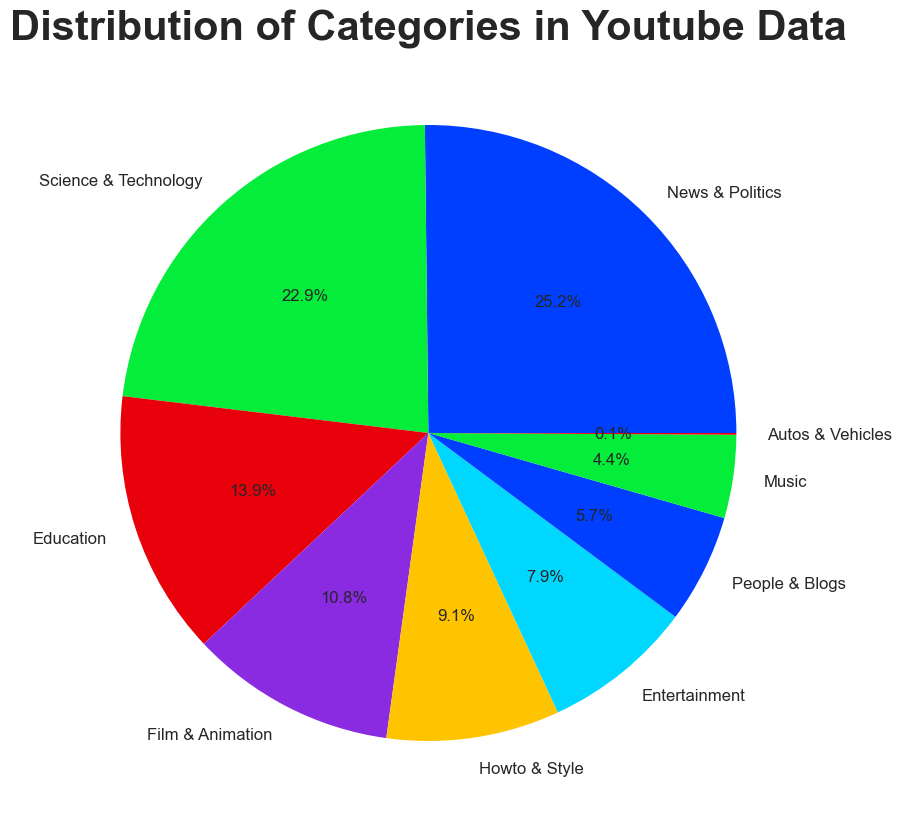

In [130]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize=(10,10))
plt.pie(video_data['Categories'].value_counts(),labels=video_data['Categories'].value_counts().index,autopct="%1.1f%%",textprops={'fontsize':12})
plt.title("Distribution of Categories in Youtube Data", fontsize=30, fontweight='bold')
plt.show()